In [1]:
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [2]:
df = pd.read_csv('E:/loan/loan.csv')

C:\Users\AADHI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(887379, 74)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

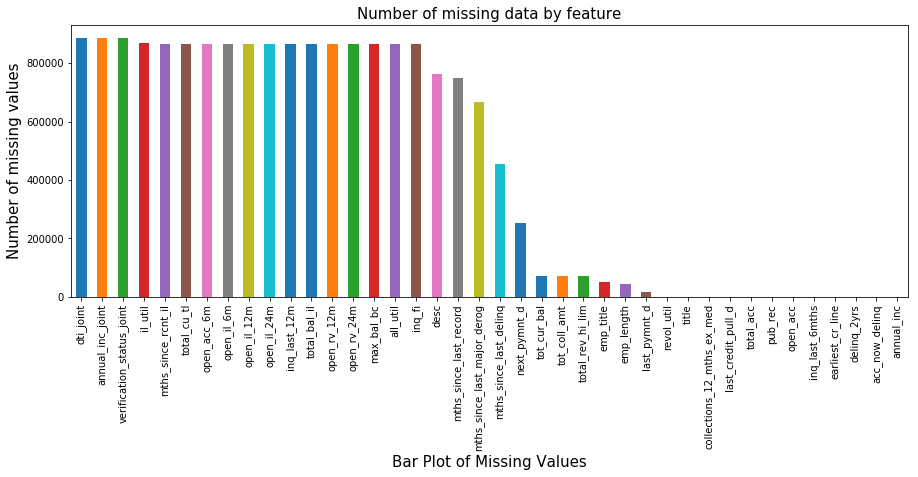

In [5]:
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()


In [6]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
dti_joint,886870,99.942640
verification_status_joint,886868,99.942415
annual_inc_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
all_util,866007,97.591559
max_bal_bc,866007,97.591559
open_rv_24m,866007,97.591559
open_rv_12m,866007,97.591559
total_cu_tl,866007,97.591559


In [7]:
Data = pd.concat([df.title, df.purpose],axis=1, keys=["title", "purpose"])
Data.head(25)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other


In [8]:
# Any variable having missing values more than 50 percent are removed
df.drop(["dti_joint", "verification_status_joint", "annual_inc_joint", "il_util", "mths_since_rcnt_il",
            "all_util", "max_bal_bc", "open_rv_24m", "open_rv_12m", "total_cu_tl", "total_bal_il", "open_il_24m",
            "open_il_12m", "total_cu_tl", "total_bal_il", "open_il_24m", "open_il_12m", "open_il_6m", "open_acc_6m",
            "inq_fi", "inq_last_12m", "desc", "mths_since_last_record", "mths_since_last_major_derog",
            "mths_since_last_delinq", "next_pymnt_d", "total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"], axis=1,
           inplace=True)

# Delete unwanted columns
df.drop(["id", "url", "member_id"], axis=1, inplace=True)

# Payment plan has all the values "n" and only 3 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

# Since we have both address state and zip code let's drop zip code and use address state only
df.drop(["zip_code"], axis=1, inplace=True)

# Title is not important instead we will use "purpose" variable
df.drop(["title"], axis=1, inplace=True)

# The grade is implied by the subgrade, so let's drop the grade column.
df.drop(["grade"], axis=1, inplace=True)

In [9]:
# remove "months" from "36 months" and convert it to int type
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

In [10]:
df['term']

0         36
1         60
2         36
3         36
4         60
5         36
6         60
7         36
8         60
9         60
10        60
11        36
12        36
13        36
14        36
15        36
16        36
17        36
18        36
19        36
20        60
21        36
22        36
23        36
24        36
25        36
26        36
27        60
28        36
29        36
30        36
31        36
32        60
33        36
34        36
35        36
36        36
37        36
38        36
39        60
40        36
41        36
42        36
43        36
44        36
45        36
46        36
47        36
48        36
49        36
50        36
51        36
52        36
53        36
54        36
55        60
56        60
57        36
58        36
59        36
60        60
61        60
62        60
63        36
64        60
65        36
66        60
67        36
68        60
69        36
70        60
71        36
72        36
73        36
74        36
75        36
76        36

In [11]:
# Again Check missing values count and percent in remaining columns
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
collections_12_mths_ex_med,145,0.016340
last_credit_pull_d,53,0.005973
acc_now_delinq,29,0.003268
total_acc,29,0.003268
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268


Text(0,0.5,'Loan Amount')

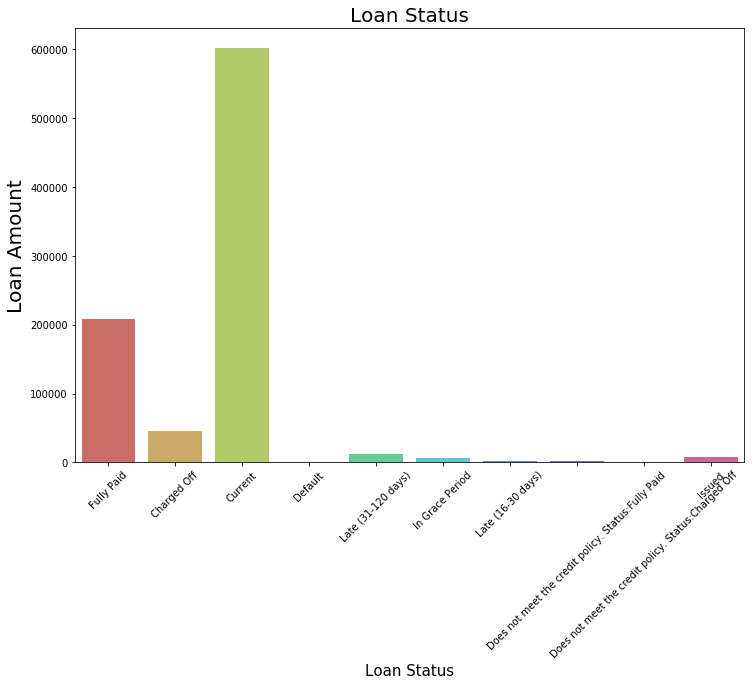

In [12]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [13]:
#Missforest implementation for missing values
#!pip install predictive_imputer
import predictive_imputer
df.shape


(887379, 42)

In [14]:
#Removing Issued from loan status
df = df.drop(df[df.loan_status =='Issued'].index)

In [15]:
df.shape

(878919, 42)

In [16]:
df["emp_title"].value_counts(ascending=False).head()
df["emp_title"]= df["emp_title"].fillna(df["emp_title"].mode()[0])

In [17]:
df["emp_length"].value_counts(ascending=False).head()
df["emp_length"]= df["emp_length"].fillna(df["emp_length"].mode()[0])


In [18]:
df["annual_inc"].value_counts(ascending=False)
df["annual_inc"]= df["annual_inc"].fillna(df["annual_inc"].median())

In [19]:
df["last_pymnt_d"]= pd.to_datetime(df["last_pymnt_d"])
df["last_pymnt_d"].value_counts(ascending=False).head()
# Lets fill mode value in place of the missing value
df["last_pymnt_d"]= df["last_pymnt_d"].fillna(df["last_pymnt_d"].mode()[0])

In [20]:
df["revol_util"].value_counts(ascending=False).head()
df["revol_util"]= df["revol_util"].fillna(df["revol_util"].median())

In [21]:
df["purpose"].value_counts(ascending=False).head()
df["purpose"]= df["purpose"].fillna(df["purpose"].mode()[0])

In [22]:
df["collections_12_mths_ex_med"].value_counts()
df["collections_12_mths_ex_med"]= df["collections_12_mths_ex_med"].fillna(df["collections_12_mths_ex_med"].mode()[0])


In [23]:
df["last_credit_pull_d"]= pd.to_datetime(df["last_credit_pull_d"])
df["last_credit_pull_d"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
df["last_credit_pull_d"]= df["last_credit_pull_d"].fillna(df["last_credit_pull_d"].mode()[0])


In [24]:
df["acc_now_delinq"].value_counts(ascending=False)
df["acc_now_delinq"]= df["acc_now_delinq"].fillna(df["acc_now_delinq"].mode()[0])

In [25]:
df["total_acc"].value_counts(ascending=False)
df["total_acc"]= df["total_acc"].fillna(df["total_acc"].median())

In [26]:
df["open_acc"].value_counts(ascending=False)
df["open_acc"]= df["open_acc"].fillna(df["open_acc"].median())

In [27]:
df["earliest_cr_line"]= pd.to_datetime(df["earliest_cr_line"])
df["earliest_cr_line"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
df["earliest_cr_line"]= df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0])

In [28]:
df["inq_last_6mths"].value_counts(ascending=False)
df["inq_last_6mths"]= df["inq_last_6mths"].fillna(df["inq_last_6mths"].mode()[0])

In [29]:
df["pub_rec"].value_counts(ascending=False)
df["pub_rec"]= df["pub_rec"].fillna(df["pub_rec"].mode()[0])

In [30]:
df["delinq_2yrs"].value_counts(ascending=False)
df["delinq_2yrs"]= df["delinq_2yrs"].fillna(df["delinq_2yrs"].mode()[0])

In [31]:
df["earliest_cr_line"] = pd.DatetimeIndex(df["earliest_cr_line"]).month
df["last_pymnt_d"] = pd.DatetimeIndex(df["last_pymnt_d"]).month
df["last_credit_pull_d"] = pd.DatetimeIndex(df["last_credit_pull_d"]).month


In [32]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [33]:
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 0,1)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Loan Amount')

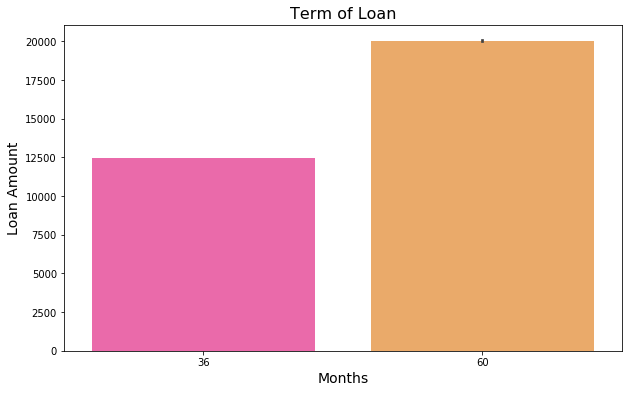

In [34]:
plt.figure(figsize=(10,6))
sns.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Frequency Distribuition- Loan Amount')

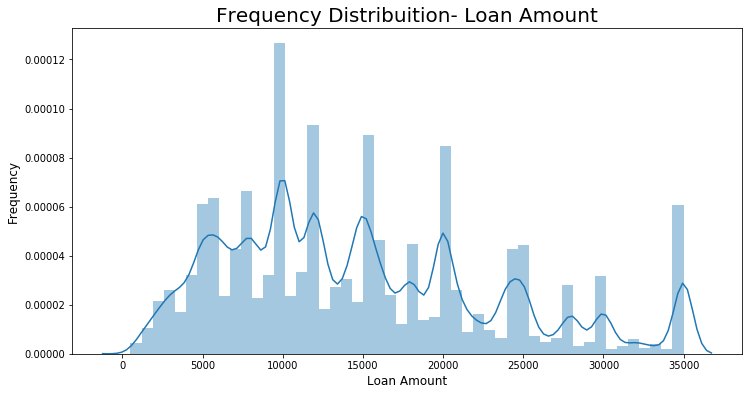

In [35]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Int Rate Distribuition')

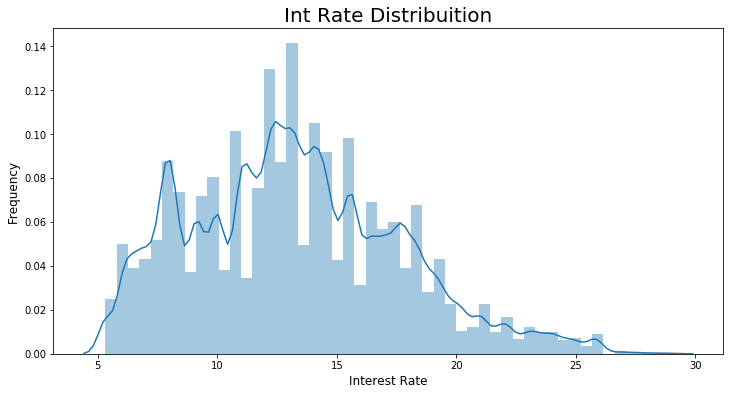

In [36]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["int_rate"])
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Int Rate Distribuition", fontsize=20)

Text(0,0.5,'Loan Amount')

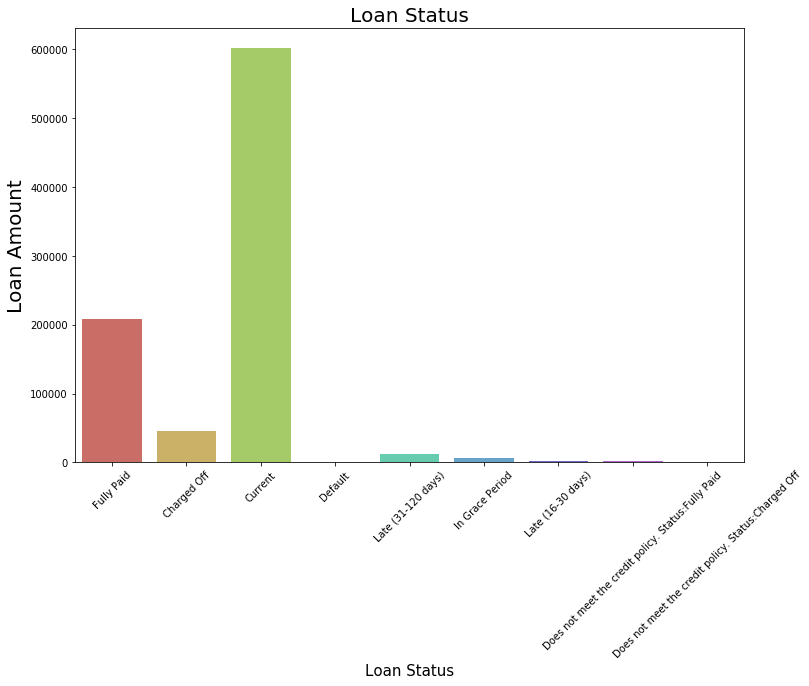

In [37]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)


Text(0,0.5,'Loan Amount')

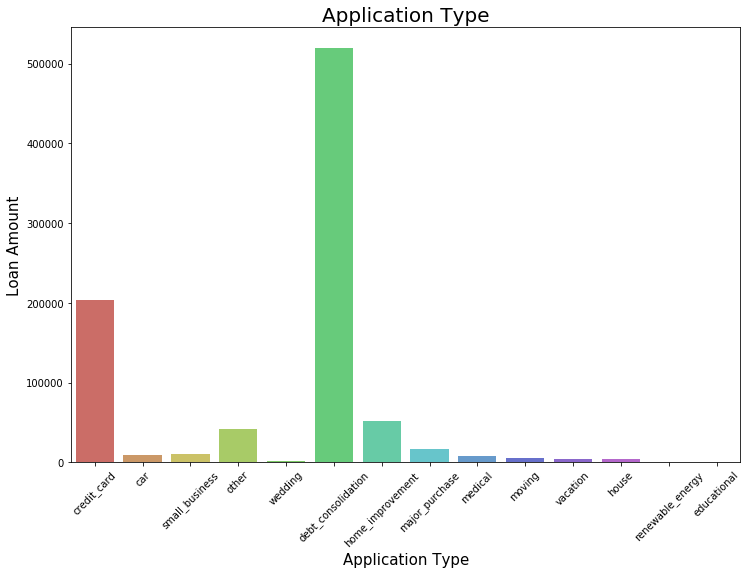

In [38]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

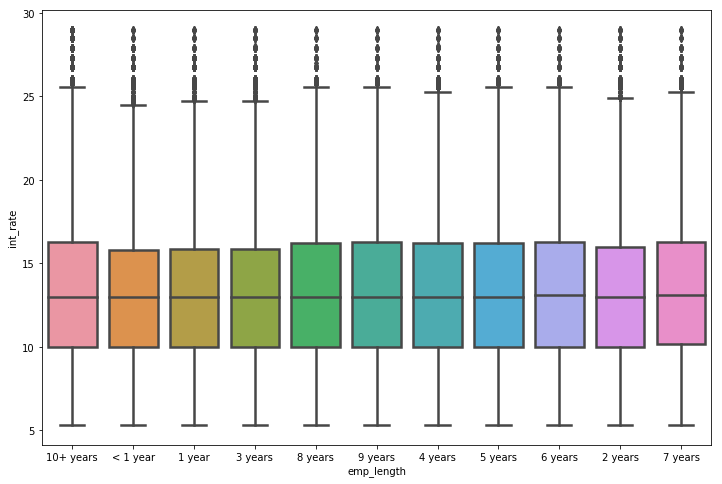

In [39]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=df, linewidth=2.5)

plt.show()

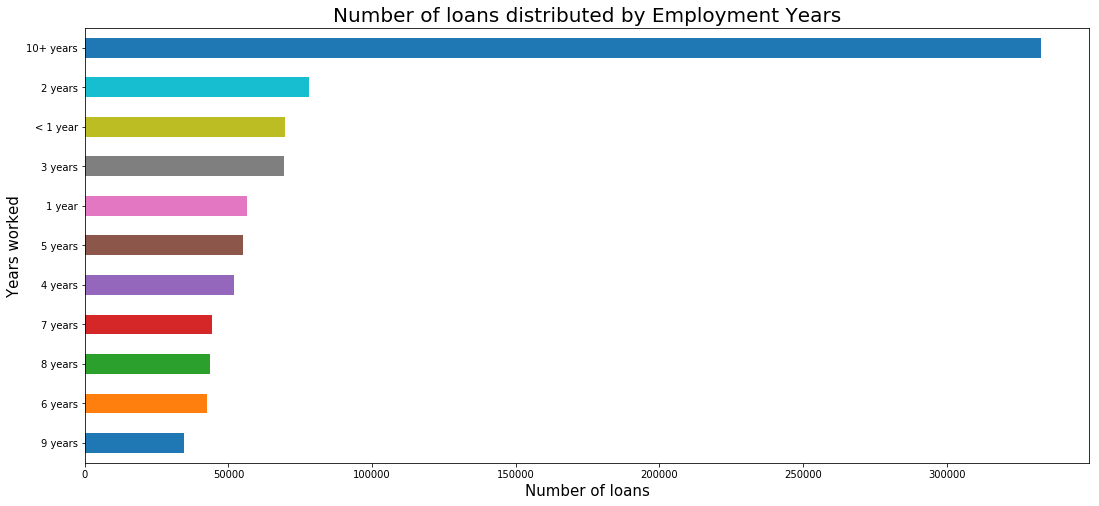

In [40]:
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);


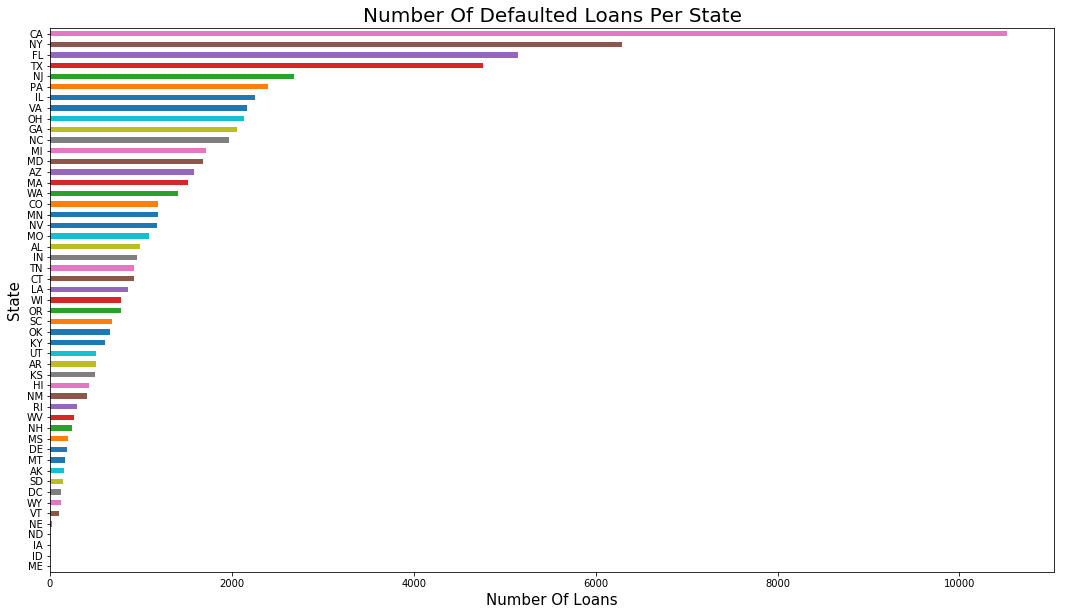

In [41]:
fig = plt.figure(figsize=(18,10))
df[df['Loan_Class']==1].groupby('addr_state')['Loan_Class'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number Of Defaulted Loans Per State',fontsize=20);

Loan Amount Distribution BoxPlot


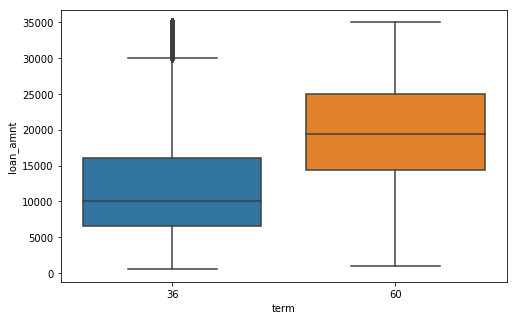

In [42]:
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=df.term, y=df.loan_amnt)

Text(0,0.5,'Loan Amount')

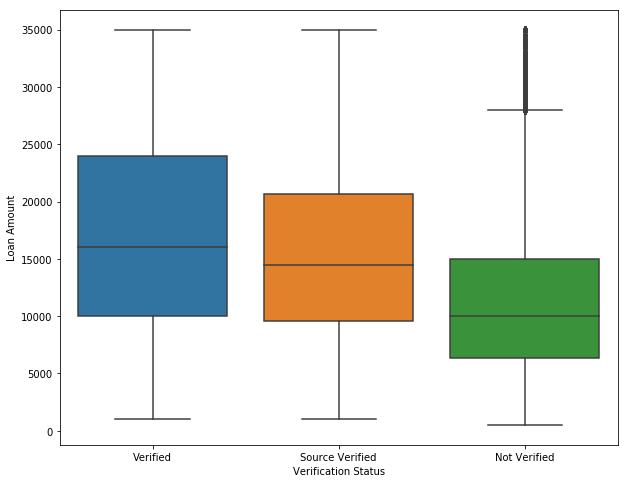

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.verification_status, y=df.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [44]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[purp_loan[0]], df[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,
car,448,4937,10,13,51,3198,40,15,70
credit_card,7826,149835,233,69,271,42250,1150,381,2096
debt_consolidation,27599,356239,790,292,808,120764,3998,1510,7419
educational,56,1,0,32,65,269,0,0,0
home_improvement,2269,34980,47,71,143,12660,367,137,662
house,286,1854,7,11,33,1366,37,15,61
major_purchase,874,10308,14,23,100,5391,125,51,207
medical,569,5324,15,22,36,2285,56,17,125
moving,425,3121,11,15,31,1603,43,23,90


In [45]:
correlation_m = df.corr()
correlation_m["Loan_Class"].sort_values(ascending=False)

Loan_Class                    1.000000
recoveries                    0.390715
collection_recovery_fee       0.269522
last_pymnt_d                  0.176827
int_rate                      0.175858
total_rec_late_fee            0.166126
last_credit_pull_d            0.119807
inq_last_6mths                0.081091
total_rec_int                 0.065003
revol_util                    0.049965
term                          0.039751
installment                   0.014338
dti                           0.010187
loan_amnt                     0.003711
funded_amnt                   0.003008
delinq_2yrs                   0.002941
funded_amnt_inv               0.000201
acc_now_delinq               -0.000039
earliest_cr_line             -0.003070
collections_12_mths_ex_med   -0.006699
pub_rec                      -0.013398
open_acc                     -0.015824
total_acc                    -0.017944
revol_bal                    -0.020704
annual_inc                   -0.034185
total_pymnt              

Text(0,0.5,'Frequency')

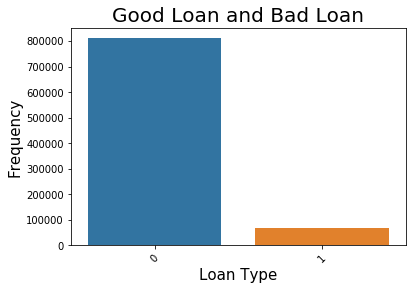

In [46]:
g= sns.countplot(df["Loan_Class"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

In [47]:
cols= ['sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state',
       'initial_list_status', 'application_type']

for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i]= lbl.transform(list(df[i].values))

In [109]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'Loan_Class'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
X = df.ix[:, df.columns != "Loan_Class"]
y = df["Loan_Class"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [49]:
X_train.shape, X_test.shape

((703135, 42), (175784, 42))

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878919 entries, 0 to 887378
Data columns (total 43 columns):
loan_amnt                     878919 non-null float64
funded_amnt                   878919 non-null float64
funded_amnt_inv               878919 non-null float64
term                          878919 non-null int32
int_rate                      878919 non-null float64
installment                   878919 non-null float64
sub_grade                     878919 non-null int64
emp_title                     878919 non-null int64
emp_length                    878919 non-null int64
home_ownership                878919 non-null int64
annual_inc                    878919 non-null float64
verification_status           878919 non-null int64
issue_d                       878919 non-null int64
loan_status                   878919 non-null int64
purpose                       878919 non-null int64
addr_state                    878919 non-null int64
dti                           878919 non-null

In [157]:
import pandas_profiling

C:\Users\AADHI\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\AADHI\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\AADHI\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\AADHI\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\AAD

In [158]:
pandas_profiling.ProfileReport(df)

Number of variables,44
Number of observations,878919
Total Missing (%),0.0%
Total size in memory,288.3 MiB
Average record size in memory,344.0 B
Numeric,32
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,8


#Model Fitting

In [57]:
log= LogisticRegression()
log.fit(X_train, y_train)

y_pred= log.predict(X_test)

# Summary of the prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    162414
           1       0.99      0.94      0.97     13370

   micro avg       1.00      1.00      1.00    175784
   macro avg       1.00      0.97      0.98    175784
weighted avg       1.00      1.00      1.00    175784

[[162348     66]
 [   766  12604]]
Accuracy of the model is:  0.9952669184908751


In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=50, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

10-fold cross validation average accuracy: 0.995


In [197]:
Data_F1 = pd.DataFrame(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq'])
Hal = pd.DataFrame(np.std(X_train, 0)*log.coef_)
Hal = Hal.transpose()

In [198]:
data= pd.concat([Data_F1, Hal],axis=1,ignore_index=True)
data = data.rename(columns={0: 'Feature', 1: 'Importance'})
data.head(42)

,Feature,Importance
0,loan_amnt,1.237411
1,funded_amnt,17.193167
2,funded_amnt_inv,10.951998
3,term,0.006251
4,int_rate,0.665050
5,installment,1.893857
6,sub_grade,-0.478717
7,emp_title,0.069767
8,emp_length,-0.001879
9,home_ownership,0.044964


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[162348     66]
 [   766  12604]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    162414
           1       0.99      0.94      0.97     13370

   micro avg       1.00      1.00      1.00    175784
   macro avg       1.00      0.97      0.98    175784
weighted avg       1.00      1.00      1.00    175784



In [62]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


#ROC Curve

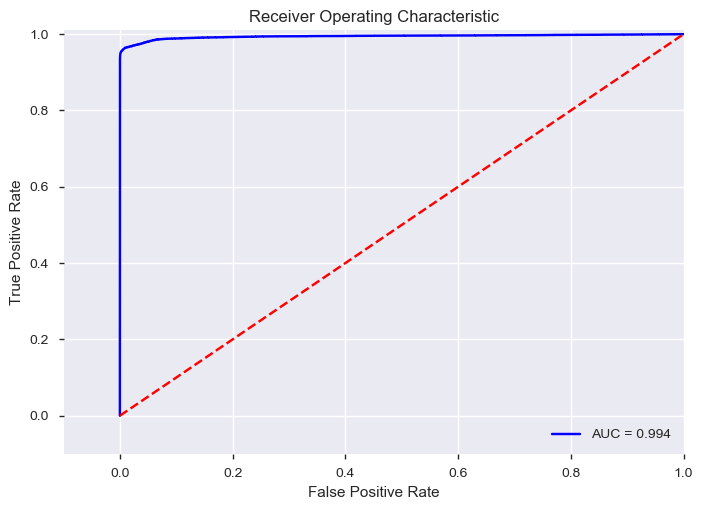

In [164]:
tmp = log.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [208]:
print_score(clf_rf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    162414
           1       1.00      1.00      1.00     13370

   micro avg       1.00      1.00      1.00    175784
   macro avg       1.00      1.00      1.00    175784
weighted avg       1.00      1.00      1.00    175784


Confusion Matrix: 
 [[162414      0]
 [     9  13361]]



In [209]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV1 = RandomForestClassifier(n_estimators=40, random_state=21)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV1, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 1.000


In [65]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(15, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Randforest Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('random_forest.png')

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
def kfold_RandFor(train_df, num_folds, stratified = False):
    print("Starting RandForest Train shape: {}".format(train_df.shape))
    
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = np.zeros(train_df.shape[0])

    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['Loan_Class']]
    
    # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['Loan_Class'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['Loan_Class'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['Loan_Class'].iloc[valid_idx]

    
        clf = RandomForestClassifier(n_estimators=40, random_state=21)

        # Fitting the model and evaluating by AUC
        clf.fit(X_train, y_train)
        # Dataframe holding the different features and their importance
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        # Freeing up memory
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    display_importances(feature_importance_df)
    return feature_importance_df

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [73]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

Starting RandForest Train shape: (878919, 43)


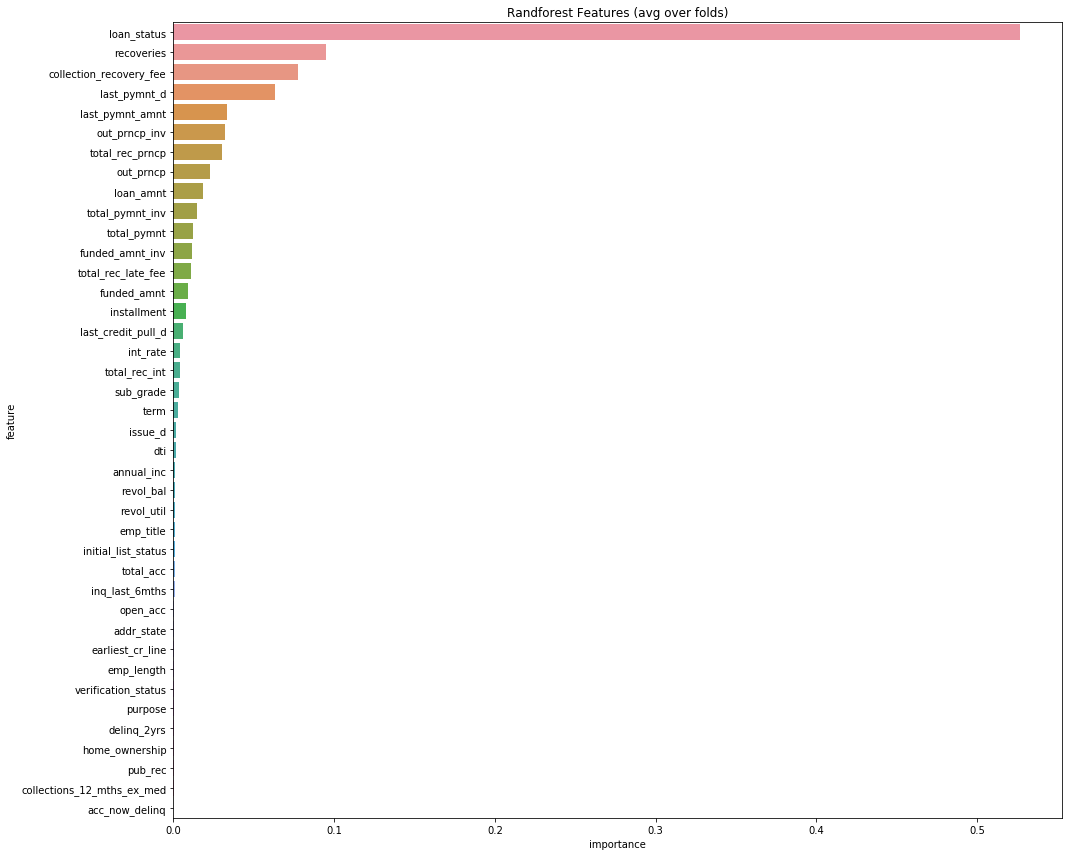

In [74]:
feat_importance = kfold_RandFor(df, num_folds= 10, stratified= True)

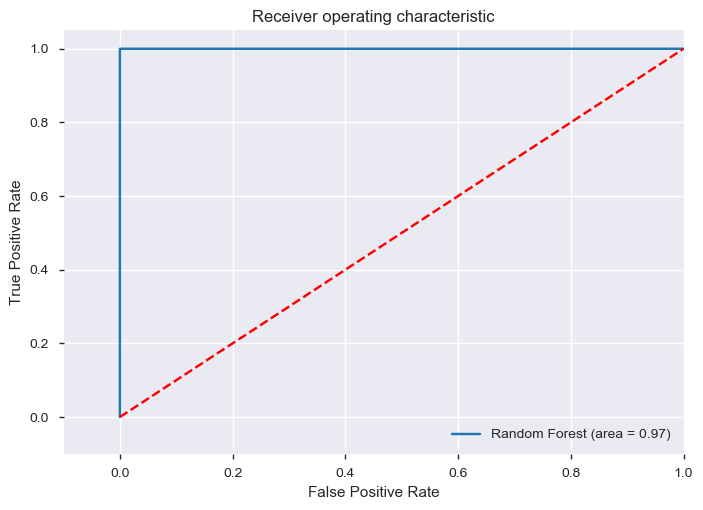

In [213]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Model serialization/Marshalling

In [189]:
import pickle
import requests,json

In [191]:
pickle.dump(log,open("log_reg.pkl","wb"))

In [172]:
My_Log_reg = pickle.load(open("log_reg.pkl","rb"))

In [173]:
My_Log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [175]:
print(classification_report(y_test,My_Log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    162414
           1       0.99      0.94      0.97     13370

   micro avg       1.00      1.00      1.00    175784
   macro avg       1.00      0.97      0.98    175784
weighted avg       1.00      1.00      1.00    175784



In [179]:
keys = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq']
values = [-0.61065654, -0.60945773, -0.60387445, -0.65465035, -0.1296644 ,
       -0.46933623,  0.00480392, -0.18302293, -0.1683792 ,  1.09156547,
       -0.79549802, -0.03463855, -1.30598912, -0.54651628, -0.25097976,
       -0.93347576,  0.46439524, -0.36512273, -1.10291881, -0.6952367 ,
       -1.23042096, -0.33260396, -0.40578702,  1.11195709, -1.37397171,
       -0.96302736,  0.01630418,  0.01671228, -0.76548497, -0.76311291,
       -0.70635059, -0.6170586 , -0.0977516 , -0.11190046, -0.07791545,
       -0.77602714, -0.38708304, -0.40331958, -0.10725414,  0.        ,
       -0.02285215, -0.06425756]
dictionary = dict(zip(keys, values))
print(dictionary)

{'loan_amnt': -0.61065654, 'funded_amnt': -0.60945773, 'funded_amnt_inv': -0.60387445, 'term': -0.65465035, 'int_rate': -0.1296644, 'installment': -0.46933623, 'sub_grade': 0.00480392, 'emp_title': -0.18302293, 'emp_length': -0.1683792, 'home_ownership': 1.09156547, 'annual_inc': -0.79549802, 'verification_status': -0.03463855, 'issue_d': -1.30598912, 'loan_status': -0.54651628, 'purpose': -0.25097976, 'addr_state': -0.93347576, 'dti': 0.46439524, 'delinq_2yrs': -0.36512273, 'earliest_cr_line': -1.10291881, 'inq_last_6mths': -0.6952367, 'open_acc': -1.23042096, 'pub_rec': -0.33260396, 'revol_bal': -0.40578702, 'revol_util': 1.11195709, 'total_acc': -1.37397171, 'initial_list_status': -0.96302736, 'out_prncp': 0.01630418, 'out_prncp_inv': 0.01671228, 'total_pymnt': -0.76548497, 'total_pymnt_inv': -0.76311291, 'total_rec_prncp': -0.70635059, 'total_rec_int': -0.6170586, 'total_rec_late_fee': -0.0977516, 'recoveries': -0.11190046, 'collection_recovery_fee': -0.07791545, 'last_pymnt_d': -0

In [192]:
url = "http://localhost:9000/api"
data = json.dumps({'loan_amnt': -0.61065654, 'funded_amnt': -0.60945773, 'funded_amnt_inv': -0.60387445, 'term': -0.65465035, 'int_rate': -0.1296644, 'installment': -0.46933623, 'sub_grade': 0.00480392, 'emp_title': -0.18302293, 'emp_length': -0.1683792, 'home_ownership': 1.09156547, 'annual_inc': -0.79549802, 'verification_status': -0.03463855, 'issue_d': -1.30598912, 'loan_status': -0.54651628, 'purpose': -0.25097976, 'addr_state': -0.93347576, 'dti': 0.46439524, 'delinq_2yrs': -0.36512273, 'earliest_cr_line': -1.10291881, 'inq_last_6mths': -0.6952367, 'open_acc': -1.23042096, 'pub_rec': -0.33260396, 'revol_bal': -0.40578702, 'revol_util': 1.11195709, 'total_acc': -1.37397171, 'initial_list_status': -0.96302736, 'out_prncp': 0.01630418, 'out_prncp_inv': 0.01671228, 'total_pymnt': -0.76548497, 'total_pymnt_inv': -0.76311291, 'total_rec_prncp': -0.70635059, 'total_rec_int': -0.6170586, 'total_rec_late_fee': -0.0977516, 'recoveries': -0.11190046, 'collection_recovery_fee': -0.07791545, 'last_pymnt_d': -0.77602714, 'last_pymnt_amnt': -0.38708304, 'last_credit_pull_d': -0.40331958, 'collections_12_mths_ex_med': -0.10725414, 'policy_code': 0.0, 'application_type': -0.02285215, 'acc_now_delinq': -0.06425756})
r = requests.post(url,data)
print(r.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [178]:
X_test[0]

array([-0.61065654, -0.60945773, -0.60387445, -0.65465035, -0.1296644 ,
       -0.46933623,  0.00480392, -0.18302293, -0.1683792 ,  1.09156547,
       -0.79549802, -0.03463855, -1.30598912, -0.54651628, -0.25097976,
       -0.93347576,  0.46439524, -0.36512273, -1.10291881, -0.6952367 ,
       -1.23042096, -0.33260396, -0.40578702,  1.11195709, -1.37397171,
       -0.96302736,  0.01630418,  0.01671228, -0.76548497, -0.76311291,
       -0.70635059, -0.6170586 , -0.0977516 , -0.11190046, -0.07791545,
       -0.77602714, -0.38708304, -0.40331958, -0.10725414,  0.        ,
       -0.02285215, -0.06425756])

In [185]:
for i in keys:
    print("data['%s'],"%(i))

data['loan_amnt'],
data['funded_amnt'],
data['funded_amnt_inv'],
data['term'],
data['int_rate'],
data['installment'],
data['sub_grade'],
data['emp_title'],
data['emp_length'],
data['home_ownership'],
data['annual_inc'],
data['verification_status'],
data['issue_d'],
data['loan_status'],
data['purpose'],
data['addr_state'],
data['dti'],
data['delinq_2yrs'],
data['earliest_cr_line'],
data['inq_last_6mths'],
data['open_acc'],
data['pub_rec'],
data['revol_bal'],
data['revol_util'],
data['total_acc'],
data['initial_list_status'],
data['out_prncp'],
data['out_prncp_inv'],
data['total_pymnt'],
data['total_pymnt_inv'],
data['total_rec_prncp'],
data['total_rec_int'],
data['total_rec_late_fee'],
data['recoveries'],
data['collection_recovery_fee'],
data['last_pymnt_d'],
data['last_pymnt_amnt'],
data['last_credit_pull_d'],
data['collections_12_mths_ex_med'],
data['policy_code'],
data['application_type'],
data['acc_now_delinq'],
